# Matrices de confucion para varios estimadores

Ponemos los clasificadores:

In [11]:
%matplotlib inline 
from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn

from sklearn import cross_validation
from sklearn import tree
from sklearn.svm import SVC
from sklearn import naive_bayes
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

#plt.style.use('fivethirtyeight') # Good looking plots
pd.set_option('display.max_columns', None) # Display any number of columns

import seaborn as sns

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split, cross_val_score


tfidf_vect= TfidfVectorizer(use_idf=True, smooth_idf=True, sublinear_tf=False, ngram_range=(4,4))
import pandas as pd

df = pd.read_csv('/Users/user/Jupyter/datasets/thesis/thesis_corpus.csv', sep='|').dropna()


X = tfidf_vect.fit_transform(df['content'].values)
y = df['labels'].values
set(y)

{0.0, 1.0, 2.0, 3.0, 4.0}

In [23]:
df.head()

,id,content,labels
0,AEG_Electrolux_60840_Lavamat__Opinion_1506705....,Silencio y facilidad. Con estas dos palabras s...,1.0
1,AEG_Electrolux_62610_Lavamat__Opinion_2000923....,Hola compis!No sabía como se ponía una lavador...,1.0
2,AEG_Electrolux_L14800VI__Opinion_2005396.html.txt,Esta lavadora es de lo más práctica para aquel...,1.0
3,AEG_Electrolux_L6227FL__Opinion_2140710.html.txt,Buenas tardes amigos y compañeros de ciao...De...,1.0
4,AEG_Electrolux_L62280FL__Opinion_2151025.html.txt,Empecemos por una ventaja muy importante: la c...,1.0


## Hacemos validacion cruzada

In [24]:
def stratified_cv(X, y, clf_class, shuffle=True, n_folds=10, **kwargs):
    stratified_k_fold = cross_validation.StratifiedKFold(y, n_folds=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    for ii, jj in stratified_k_fold:
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred

Podemos configurar de distintas formas los estimadores:

In [25]:
from functools import partial
from sklearn import svm
#C=1.0, kernel='rbf', degree=3, gamma=0.0, coef0=0.0, 
#shrinking=True, probability=False, tol=0.001, cache_size=200, 
#class_weight=None, verbose=False, max_iter=-1, random_state=None
linear_svm = partial(svm.SVC, kernel='linear', C = 1, gamma = 1)


#Perceptron (se tardaba)

#penalty=None, alpha=0.0001, fit_intercept=True, n_iter=5, shuffle=True, verbose=0,
#eta0=1.0, n_jobs=1, random_state=0, class_weight=None, warm_start=False

from sklearn.linear_model import Perceptron
perceptron = partial(Perceptron,n_jobs=-1)


Ahora imprimimos accuracy:

In [26]:
print('Passive Aggressive Classifier:{:.2f}     '.format(metrics.accuracy_score(
            y, stratified_cv(X, y, linear_model.PassiveAggressiveClassifier))))

#print('Gradient Boosting Classifier:  {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X.toarray(), y, ensemble.GradientBoostingClassifier))))

print('Support vector machine(linear):{:.2f}     '.format(metrics.accuracy_score(
            y, stratified_cv(X, y, linear_svm))))

print('Support vector machine(regular):{:.2f}     '.format(metrics.accuracy_score(
            y, stratified_cv(X, y, svm.SVC))))

print('Random Forest Classifier:{:.2f}     '.format(metrics.accuracy_score(y, stratified_cv(
                X, y, ensemble.RandomForestClassifier))))

print('K Nearest Neighbor Classifier:{:.2f}     '.format(metrics.accuracy_score(y, stratified_cv(
                X, y, neighbors.KNeighborsClassifier))))

print('Logistic Regression:{:.2f}     '.format(metrics.accuracy_score(y, stratified_cv(
                X, y, linear_model.LogisticRegression))))

print('Multinomial NB:{:.2f}     '.format(metrics.accuracy_score(y, stratified_cv(
                X, y, naive_bayes.MultinomialNB))))

# linear_model.Perceptron

print('Perceptron:{:.2f}     '.format(metrics.accuracy_score(y, stratified_cv(
                X, y,perceptron))))


Passive Aggressive Classifier:0.75     
Support vector machine(linear):0.74     
Support vector machine(regular):0.69     
Random Forest Classifier:0.76     
K Nearest Neighbor Classifier:0.74     
Logistic Regression:0.70     
Multinomial NB:0.72     
Perceptron:0.77     


In [27]:
pass_agg_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, linear_model.PassiveAggressiveClassifier))
print ('pass agressive\n',pass_agg_conf_matrix)

mnb = metrics.confusion_matrix(y, stratified_cv(X, y, naive_bayes.MultinomialNB))
print ('\n mnb\n',mnb)
#grad_ens_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))
#print grad_ens_conf_matrix

ridge_clf_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, linear_model.RidgeClassifier))
print ('\n ridge\n',ridge_clf_conf_matrix)

svm_svc_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, svm.SVC))
print ('\n svm \n',svm_svc_conf_matrix)
#linear_svm
svm_svc_conf_matrix_linear = metrics.confusion_matrix(y, stratified_cv(X, y, linear_svm))
print( '\n svm lineal\n',svm_svc_conf_matrix_linear)

random_forest_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, ensemble.RandomForestClassifier))
print( '\n random forest\n', random_forest_conf_matrix)

k_neighbors_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))
print( '\n k neightbors \n',k_neighbors_conf_matrix)

logistic_reg_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, linear_model.LogisticRegression))
print( '\n logistic regression \n',logistic_reg_conf_matrix)

perceptron = metrics.confusion_matrix(y, stratified_cv(X,y, linear_model.Perceptron))
print ('\n perceptron \n', perceptron)

#Se tarda
#decision_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, tree.DecisionTreeClassifier))#
#print '\n decicion tree \n', decision_conf_matrix

pass agressive
 [[  43  480    0    0    0]
 [   9 1647    0    0    2]
 [   0    4   19    0    4]
 [   2   99    0    2    0]
 [   0    5    3    0  100]]

 mnb
 [[  21  502    0    0    0]
 [   2 1655    0    0    1]
 [   0   17    0    0   10]
 [   0  103    0    0    0]
 [   0   32    0    0   76]]

 ridge
 [[  35  488    0    0    0]
 [   3 1654    0    0    1]
 [   0    5   14    0    8]
 [   0  101    0    2    0]
 [   0   12    3    0   93]]

 svm 
 [[   0  523    0    0    0]
 [   0 1658    0    0    0]
 [   0   27    0    0    0]
 [   0  103    0    0    0]
 [   0  108    0    0    0]]

 svm lineal
 [[  35  488    0    0    0]
 [   4 1653    0    0    1]
 [   0    4   10    0   13]
 [   0  101    0    2    0]
 [   0   10    3    0   95]]

 random forest
 [[  75  448    0    0    0]
 [  12 1644    0    0    2]
 [   0    0   14    0   13]
 [  17   84    0    2    0]
 [   0    0    2    0  106]]

 k neightbors 
 [[ 146  377    0    0    0]
 [ 103 1542    0   10    3]
 [   0    

In [28]:
conf_matrix = {
                1: {
                    'matrix': pass_agg_conf_matrix,
                    'title': 'Passive Aggressive',
                   },
                2: {
                    'matrix': svm_svc_conf_matrix_linear,
                    'title': 'SVM lineal',
                   },
                3: {
                    'matrix': ridge_clf_conf_matrix,
                    'title': 'Regresion de arista',
                   },
                4: {
                    'matrix': svm_svc_conf_matrix,
                    'title': 'SVM',
                   },
                5: {
                    'matrix': random_forest_conf_matrix,
                    'title': 'Random Forest',
                   },
                6: {
                    'matrix': k_neighbors_conf_matrix,
                    'title': 'K Nearest Neighbors',
                   },
                7: {
                    'matrix': logistic_reg_conf_matrix,
                    'title': 'Logistic Regression',
                   },
                8:{
                    'matrix': mnb,
                    'title':'Multinomial Naive Bayes',
                },
                9:{
                    'matrix': perceptron,
                    'title':'Perceptron',
                }
            }


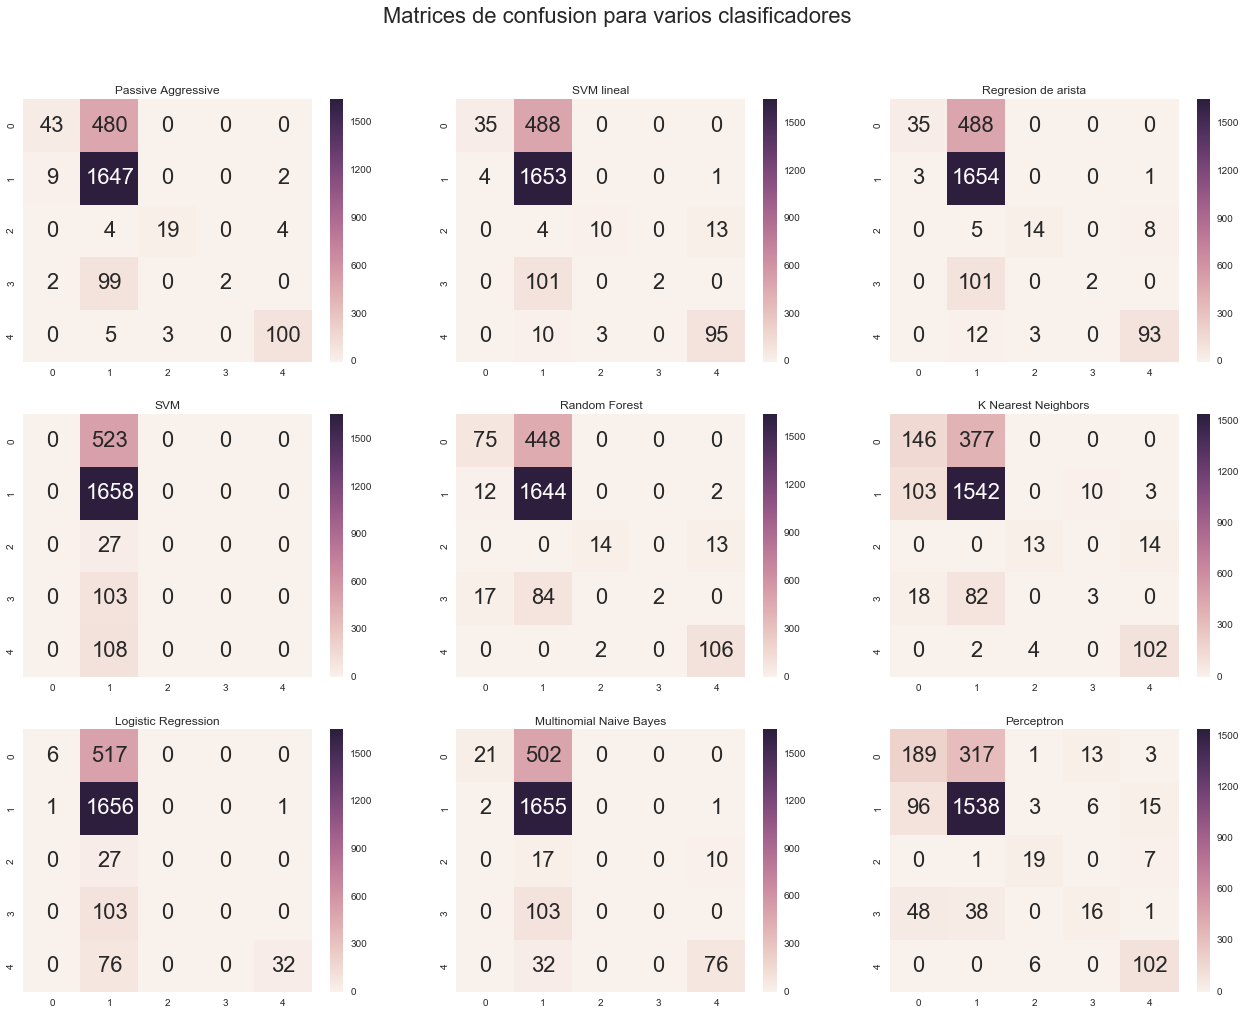

In [29]:
plt.rcParams.update({'font.size': 22})
fix, ax = plt.subplots(figsize=(22, 16))
plt.suptitle('Matrices de confusion para varios clasificadores')
for ii, values in conf_matrix.items():
    matrix = values['matrix']
    title = values['title']
    plt.subplot(3, 3, ii) # starts from 1
    plt.title(title);
    sns.heatmap(matrix, annot=True,  fmt='');
    plt.savefig('/Users/user/Tesismatrices_conf_2.png')   #lo guardamos

## Ahora los reportes de la clasificación

In [30]:
print('Passive Aggressive Classifier:\n {}\n'.format(metrics.classification_report(
            y, stratified_cv(X, y, linear_model.PassiveAggressiveClassifier))))

#print('Gradient Boosting Classifier:  {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X.toarray(), y, ensemble.GradientBoostingClassifier))))

print('Support vector machine(SVM):\n {}\n'.format(metrics.classification_report(
            y, stratified_cv(X, y, svm.SVC))))

print('Support vector machine(SVM- linear):\n {}\n'.format(metrics.classification_report(
            y, stratified_cv(X, y, linear_svm))))

print('Random Forest Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(
                X, y, ensemble.RandomForestClassifier))))

print('K Nearest Neighbor Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(
                X, y, neighbors.KNeighborsClassifier))))

print('Logistic Regression:\n {}\n'.format(metrics.classification_report(y, stratified_cv(
                X, y, linear_model.LogisticRegression))))

print('Multinomial NB:\n {}\n'.format(metrics.classification_report(y, stratified_cv(
                X, y, naive_bayes.MultinomialNB))))


print('Support vector machine(SVM):\n {}\n'.format(metrics.classification_report(
            y, stratified_cv(X, y, linear_svm))))

# linear_model.Perceptron

print('Perceptron:\n {}\n'.format(metrics.classification_report(y, stratified_cv(
                X, y, linear_model.Perceptron))))

Passive Aggressive Classifier:
              precision    recall  f1-score   support

        0.0       0.84      0.08      0.14       523
        1.0       0.74      0.99      0.85      1658
        2.0       0.86      0.70      0.78        27
        3.0       1.00      0.02      0.04       103
        4.0       0.93      0.94      0.93       108

avg / total       0.78      0.75      0.66      2419




/usr/local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Support vector machine(SVM):
              precision    recall  f1-score   support

        0.0       0.00      0.00      0.00       523
        1.0       0.69      1.00      0.81      1658
        2.0       0.00      0.00      0.00        27
        3.0       0.00      0.00      0.00       103
        4.0       0.00      0.00      0.00       108

avg / total       0.47      0.69      0.56      2419


Support vector machine(SVM- linear):
              precision    recall  f1-score   support

        0.0       0.92      0.07      0.13       523
        1.0       0.73      1.00      0.84      1658
        2.0       0.79      0.41      0.54        27
        3.0       1.00      0.02      0.04       103
        4.0       0.89      0.87      0.88       108

avg / total       0.79      0.74      0.65      2419


Random Forest Classifier:
              precision    recall  f1-score   support

        0.0       0.77      0.14      0.23       523
        1.0       0.75      0.99      0.86      

/usr/local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Logistic Regression:
              precision    recall  f1-score   support

        0.0       0.83      0.01      0.02       523
        1.0       0.69      1.00      0.82      1658
        2.0       0.00      0.00      0.00        27
        3.0       0.00      0.00      0.00       103
        4.0       1.00      0.24      0.39       108

avg / total       0.70      0.70      0.58      2419


Multinomial NB:
              precision    recall  f1-score   support

        0.0       0.92      0.04      0.08       523
        1.0       0.72      1.00      0.84      1658
        2.0       0.00      0.00      0.00        27
        3.0       0.00      0.00      0.00       103
        4.0       0.86      0.70      0.78       108

avg / total       0.73      0.73      0.63      2419


Support vector machine(SVM):
              precision    recall  f1-score   support

        0.0       0.92      0.07      0.12       523
        1.0       0.73      1.00      0.84      1658
        2.0       0.8